<a href="https://colab.research.google.com/github/Darkunquie/FMML_PROJECT_2024/blob/main/Module%202%20Lab-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Module 2: Appreciating, Interpreting and Visualizing Data**

Lab 4: t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [22]:
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale


RS = 20150101

import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
digits = load_digits()
digits.data.shape

(1797, 64)

Printing some images from the dataset

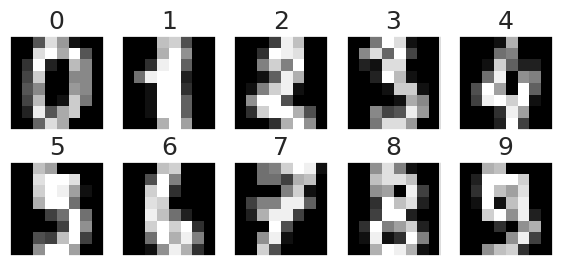

In [23]:
nrows, ncols = 2, 5
plt.figure(figsize=(7,3))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])

In [24]:
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])

Now using TSNE to fit the dataset with the default values.
1. n_components : 2
2. perplexity : 30
3. n_iter : 1000
4.method : ‘barnes_hut’

In [25]:
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])
digits_proj = TSNE(init="pca", random_state=RS).fit_transform(X)

Visualizing the data in the projected space

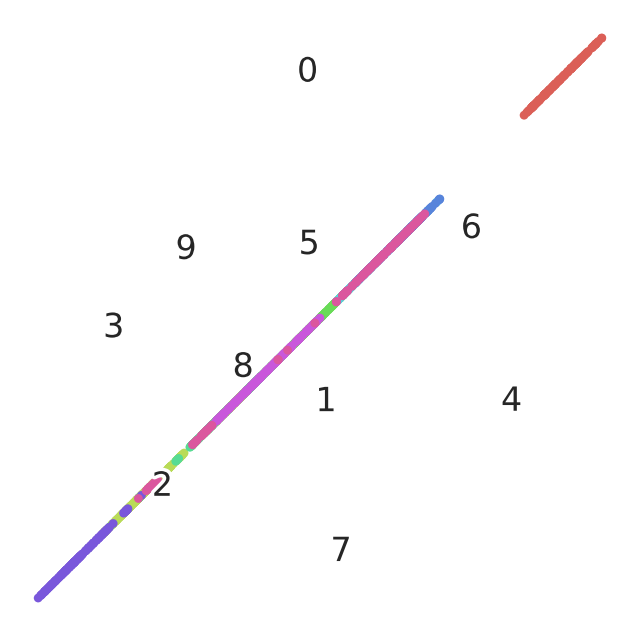

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x78cc73e80430>)

In [26]:
def scatter(x, colors):
    palette = np.array(sns.color_palette("hls", 10))

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,1], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    txts = []
    for i in range(10):
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.show()

    return f, ax, sc

scatter(digits_proj, y)

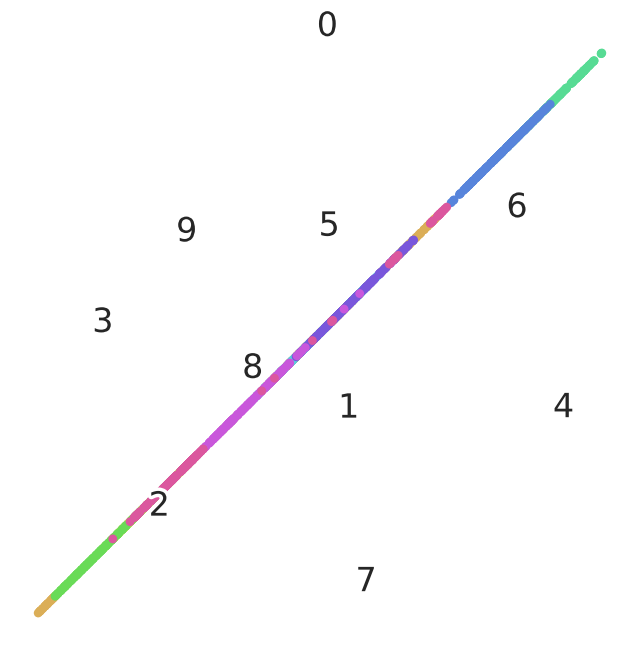

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x78cc742a3d60>)

In [30]:
def scatter(x, colors):

    palette = np.array(sns.color_palette("hls", 10))

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,0], lw=0, s=40,
                    c=palette[colors.astype(int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    txts = []
    for i in range(10):

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.show()

    return f, ax, sc

scatter(digits_proj, y)

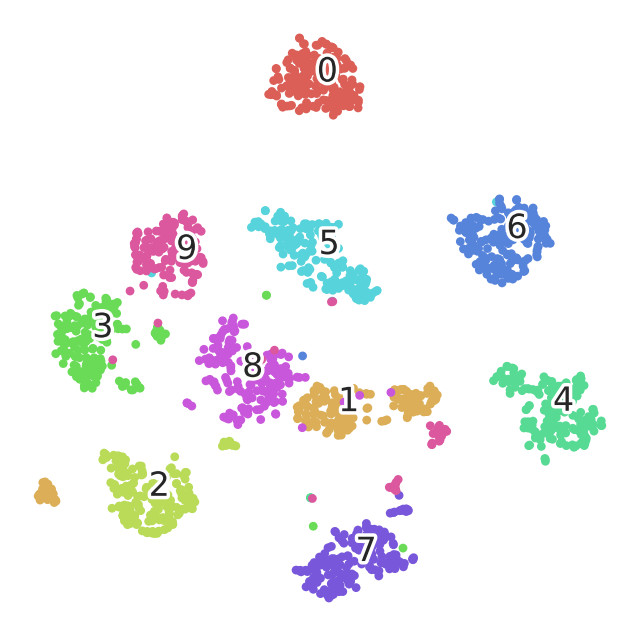

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x78cc71d004c0>)

In [32]:
def scatter(x, colors):

    palette = np.array(sns.color_palette("hls", 10))

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    txts = []
    for i in range(10):
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.show()

    return f, ax, sc

scatter(digits_proj, y)

**Tweaking some of the hyperparameters to better understand their role
**

Changing the PERPLEXITY values

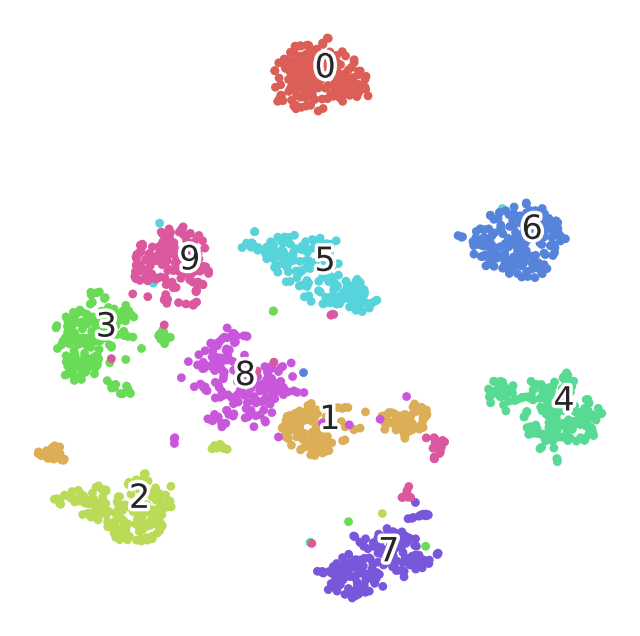

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x78cc73f03280>)

In [33]:
digits_proj = TSNE(init="pca", random_state=RS, perplexity=50).fit_transform(X)

scatter(digits_proj, y)

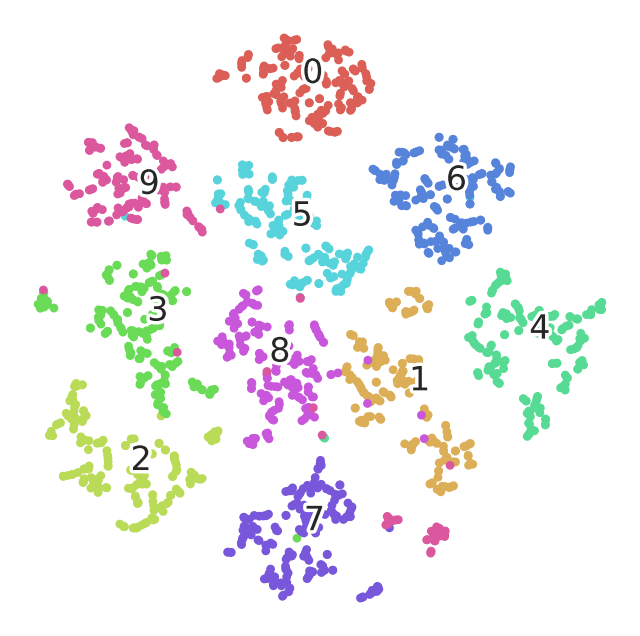

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x78cc703d3820>)

In [34]:
digits_proj = TSNE(init="pca", random_state=RS, perplexity=5).fit_transform(X)

scatter(digits_proj, y)

Changing the NUMBER OF ITERATIONS

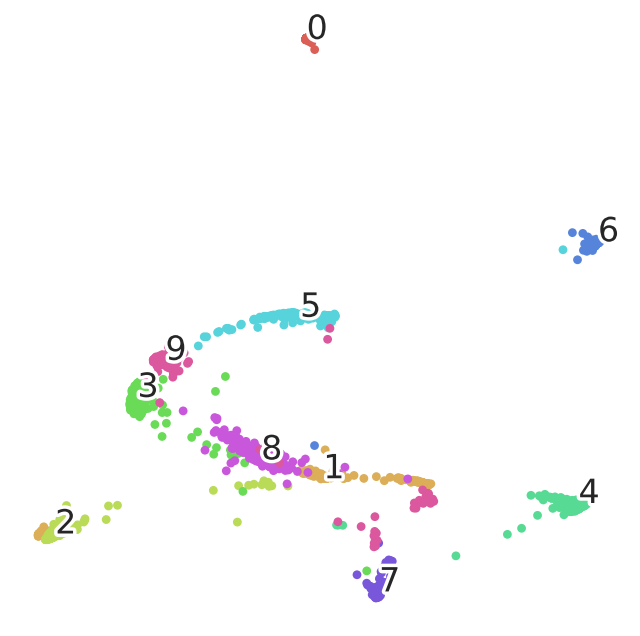

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x78cc7024a140>)

In [35]:
!pip install scikit-learn
from sklearn.manifold import TSNE

digits_proj = TSNE(init="pca", random_state=RS, n_iter=250).fit_transform(X)

scatter(digits_proj, y)

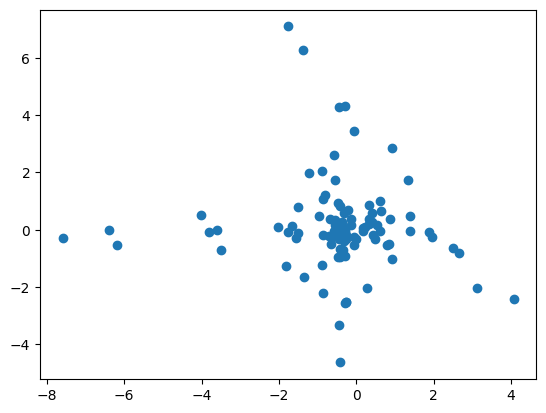

In [12]:
!pip install matplotlib
!pip install scikit-learn
!pip install numpy
from sklearn.manifold import TSNE
import numpy as np # import numpy
import matplotlib.pyplot as plt # import matplotlib

RS = 42
X = np.random.rand(100, 10)
digits_proj = TSNE(init="pca", random_state=RS, n_iter=250).fit_transform(X)

plt.scatter(digits_proj[:, 0], digits_proj[:, 1]) # Assuming you want to plot the first two dimensions of the TSNE projection
plt.show()

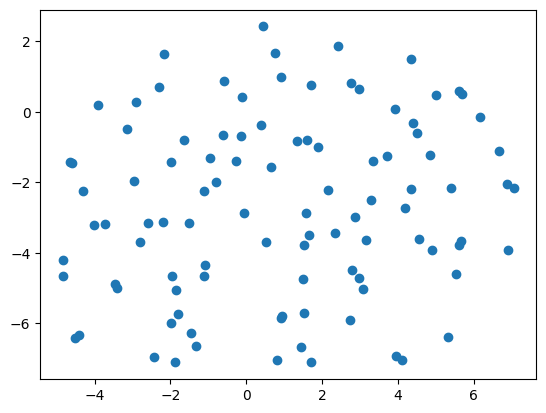

In [15]:
import matplotlib.pyplot as plt

digits_proj = TSNE(init="pca", random_state=RS, n_iter=5000).fit_transform(X)

plt.scatter(digits_proj[:, 0], digits_proj[:, 1])
plt.show()

Changing the method to EXACT

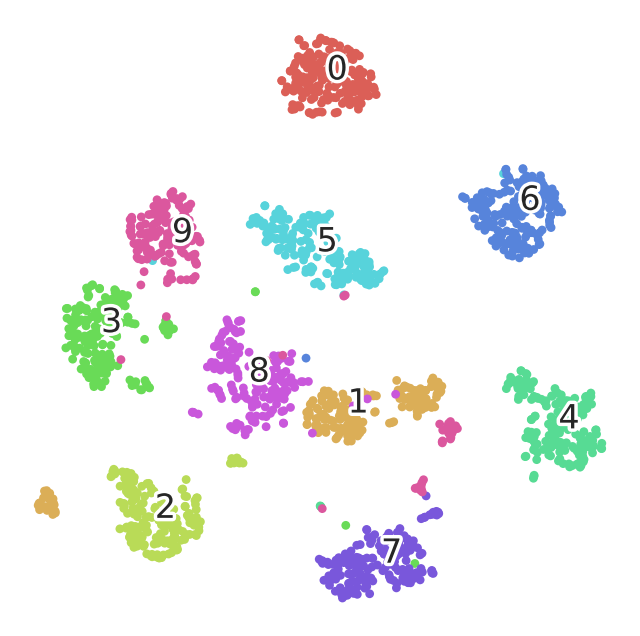

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x78cc702b9ea0>)

In [37]:
digits_proj = TSNE(init="pca", random_state=RS, method='exact').fit_transform(X)

scatter(digits_proj, y)

**EXERCISE**

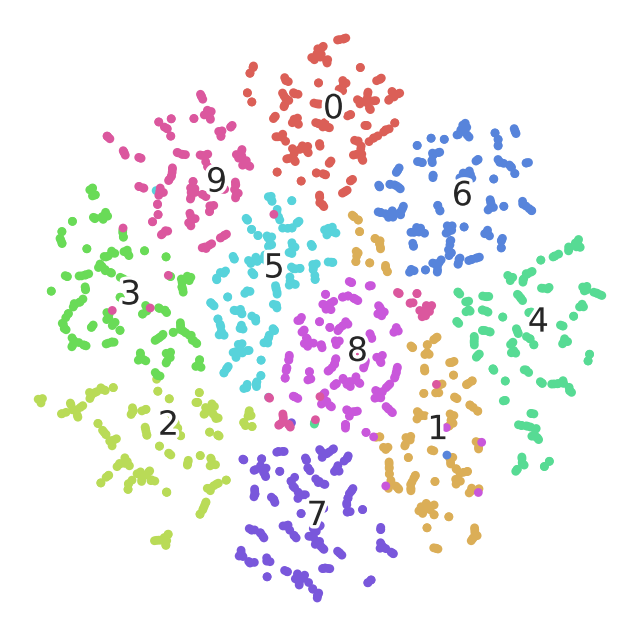

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x78cc701987c0>)

In [38]:
perplexity_value = 2
number_iterations = 1000
method = "barnes_hut"


digits_proj = TSNE(init="pca", random_state=RS, n_iter=number_iterations, perplexity=perplexity_value, method=method).fit_transform(X)
scatter(digits_proj, y)

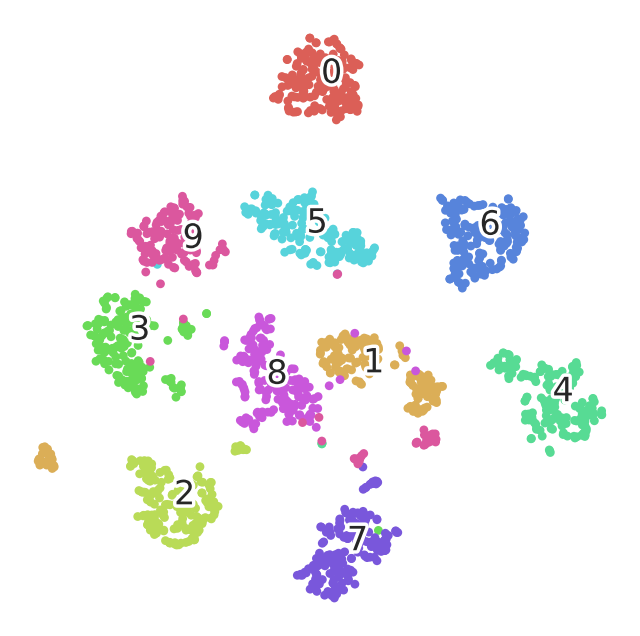

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x78cc70212e00>)

In [39]:
perplexity_value = 20
number_iterations = 1000
method = "barnes_hut"


digits_proj = TSNE(init="pca", random_state=RS, n_iter=number_iterations, perplexity=perplexity_value, method=method).fit_transform(X)
scatter(digits_proj, y)

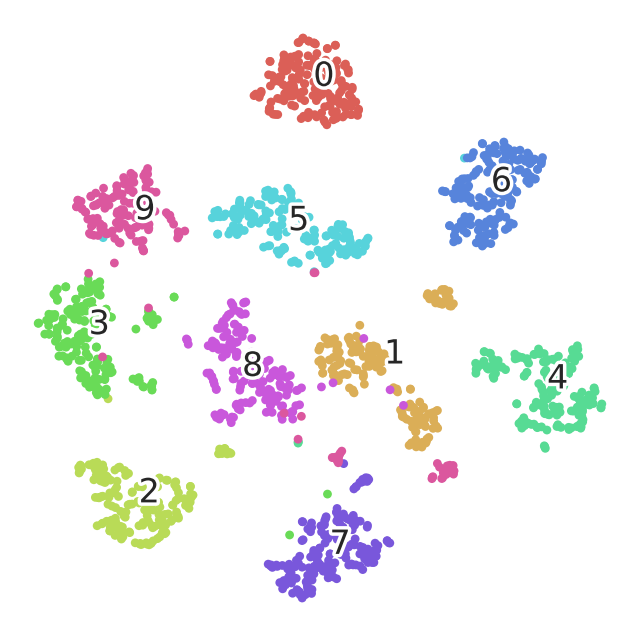

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x78cc70118190>)

In [41]:
perplexity_value = 15
number_iterations = 1000
method = "exact"

digits_proj = TSNE(init="pca", random_state=RS, n_iter=number_iterations, perplexity=perplexity_value, method=method).fit_transform(X)
scatter(digits_proj, y)

Exercise:

1.a) Which of the two algorithms is linear and which one is non-linear?

PCA: Linear
t-SNE: Non-linear


b) How does the non-linearity in one of these two algorithms help in capturing certain data sets?

The non-linearity of t-SNE allows it to capture complex relationships and patterns in data that linear methods like PCA might miss. For example, if your data forms a spiral or curved manifold, t-SNE is more likely to preserve these shapes in a lower-dimensional representation.


c) PCA is known to keep points which were further apart in...?

PCA is known to keep points which were further apart in the original high-dimensional space also further apart in the lower-dimensional space. It focuses on preserving the global structure of the data.


d) Can you comment on which one of the two is computationally more expensive?

t-SNE is computationally more expensive than PCA.
t-SNE involves calculations like pairwise distances and gradient descent optimization, which can be computationally demanding, especially for large datasets. PCA, on the other hand, relies on eigen decomposition, which is generally faster to compute.

2 .How does the computational complexity and runtime of t-SNE scale with dataset size and dimensionality?


* The t-Distributed Stochastic Neighbor Embedding (t-SNE) algorithm is commonly used for dimensionality reduction and visualization of high-dimensional data. The computational complexity and runtime of t-SNE scale with both the dataset size and dimensionality.

* For dataset size, t-SNE has a computational complexity of O(n^2), where n is the number of data points in the dataset. This means that as the dataset size increases, the computational complexity of t-SNE grows quadratically, leading to longer runtimes for larger datasets. Therefore, t-SNE can be computationally expensive for very large datasets.

* Additionally, the computational complexity of t-SNE with respect to dimensionality is O(dn), where d is the dimensionality of the original data. This implies that as the dimensionality of the input data increases, the computational complexity of t-SNE grows linearly with the dimensionality. Higher dimensional data can result in longer runtimes for the t-SNE algorithm.

3. What are some limitations or potential pitfalls to be aware of when using t-SNE? (tell atleast 3)

When using t-SNE, it's important to be aware of several limitations and potential pitfalls:

1. Sensitivity to Perplexity: t-SNE includes a perplexity parameter that can significantly impact the resulting visualization. Inaccurate or inappropriate perplexity values may lead to distorted representations of the data. It's crucial to experiment with different perplexity values to ensure the robustness of the visualization.

2. Computational Complexity: t-SNE's computational complexity is high, particularly for large datasets. Running t-SNE on extensive or high-dimensional data can be time-consuming and resource-intensive. This can make it challenging to apply t-SNE to massive datasets or in real-time applications.

3. Lack of Global Structure Preservation: t-SNE excels at capturing local structure and clustering, but it may not preserve the global structure of the data as effectively. This can result in clusters being overly emphasized in the visualization, potentially obscuring the broader relationships and patterns present in the data.